In [1]:
import pandas as pd
from scripts import cohend
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [2]:
data = pd.read_csv('data/result.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data = data.drop(data.loc[data['Category'] == 'others'].index)

data

,index,Category,Language,Lib,Year,Month,NewCommers
0,0,data-science,python,NumPy,2009,1,0
1,1,data-science,python,NumPy,2009,2,0
2,2,data-science,python,NumPy,2009,3,0
3,3,data-science,python,NumPy,2009,4,0
4,4,data-science,python,NumPy,2009,5,0
...,...,...,...,...,...,...,...
9715,4531,data-science,r,beepr,2017,8,1
9716,4532,data-science,r,beepr,2017,9,1
9717,4533,data-science,r,beepr,2017,10,0
9718,4534,data-science,r,beepr,2017,11,0


In [3]:
pythonRepeat = []
Rrepeat = []

for a in data.loc[(data['Language'] == 'python'), 'Lib'].unique().tolist():
    pythonRepeat.append([data.loc[data['Lib'] == a, 'NewCommers'].sum(), a])

for a in data.loc[(data['Language'] == 'r'), 'Lib'].unique().tolist():
    Rrepeat.append([data.loc[data['Lib'] == a, 'NewCommers'].sum(), a])

In [4]:
pythonRepeat = sorted(pythonRepeat, reverse=True)
Rrepeat = sorted(Rrepeat, reverse=True)

print("10 lib's com mais novatos em python:")
for lib in pythonRepeat[:10]:
    print(f'> lib: {lib[1]}, {lib[0]} novatos')

print("\n10 lib's com mais novatos em r:")
for lib in Rrepeat[:10]:
    print(f'> lib: {lib[1]}, {lib[0]} novatos')

10 lib's com mais novatos em python:
> lib: NumPy, 35292 novatos
> lib: Pandas, 20638 novatos
> lib: Matplotlib, 15906 novatos
> lib: Requests, 15457 novatos
> lib: Pattern, 11767 novatos
> lib: SciPy, 9708 novatos
> lib: SQLAlchemy, 5839 novatos
> lib: Selenium, 5541 novatos
> lib: ScraPy, 4219 novatos
> lib: OpenCV, 3818 novatos

10 lib's com mais novatos em r:
> lib: sf, 15310 novatos
> lib: ggplot2, 12153 novatos
> lib: rio, 10213 novatos
> lib: data.table, 7339 novatos
> lib: dplyr, 7323 novatos
> lib: zoo, 3204 novatos
> lib: scales, 2769 novatos
> lib: xml, 2713 novatos
> lib: tmap, 1605 novatos
> lib: devtools, 1419 novatos


In [5]:
dataP = pd.DataFrame(columns=['Language', 'Lib', 'NewCommers'])
dataR = pd.DataFrame(columns=['Language', 'Lib', 'NewCommers'])

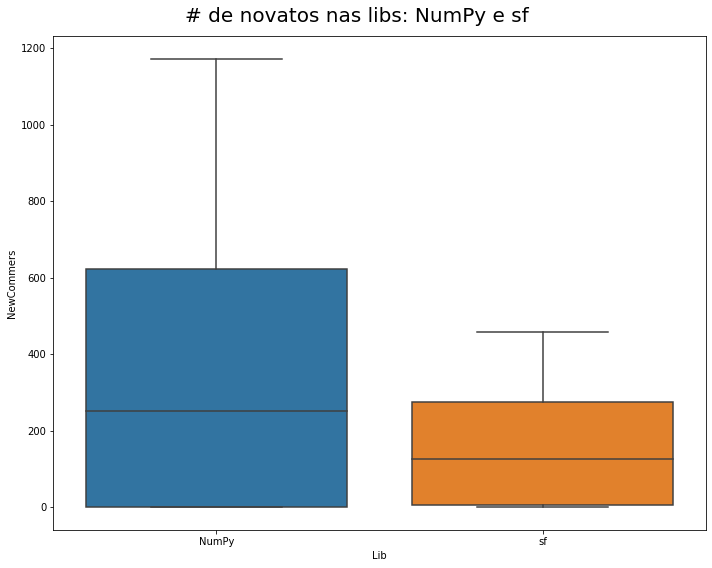

Hipotese nula rejeitada...
p:  0.0003116264413221744
d:  0.8504208131349377 
Pelo valor de "d", temos que a diferença dos conjuntos é bastante significativo



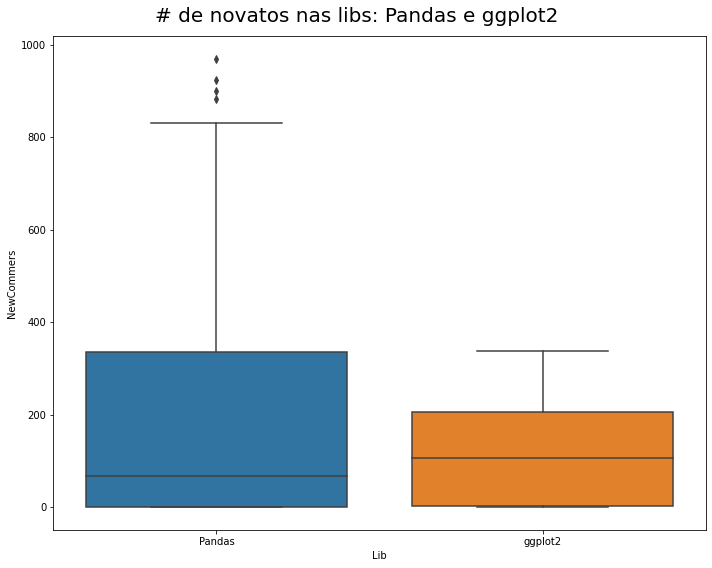

Hipotese nula não rejeitada...
p: 0.3673375932005186!




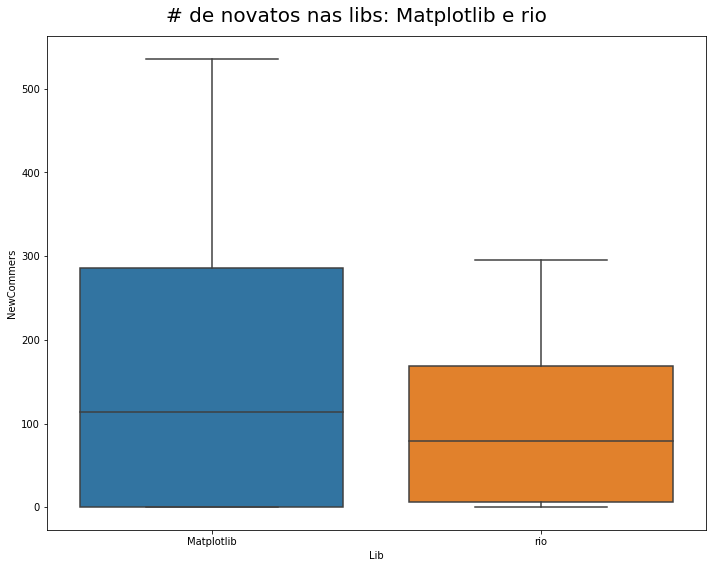

Hipotese nula rejeitada...
p:  0.015417981101743194
d:  0.5539840278296035 
Pelo valor de "d", temos que a diferença dos conjuntos é medio significativo



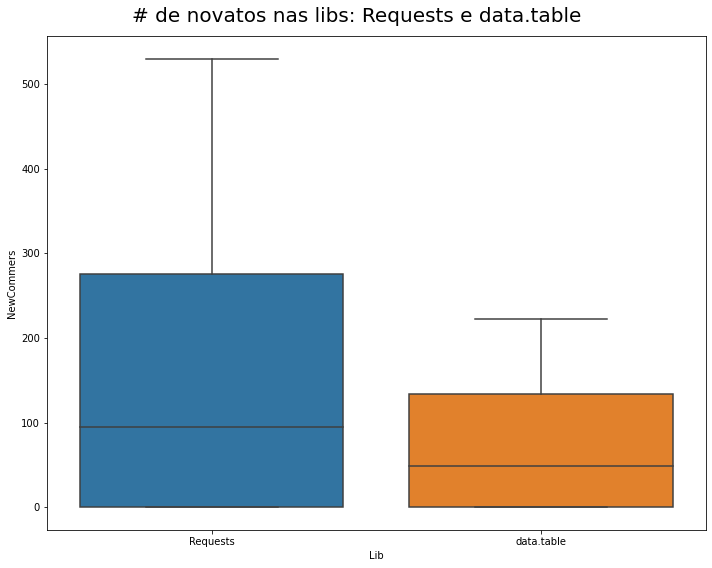

Hipotese nula rejeitada...
p:  0.0014525721320885578
d:  0.7390324638969776 
Pelo valor de "d", temos que a diferença dos conjuntos é medio significativo



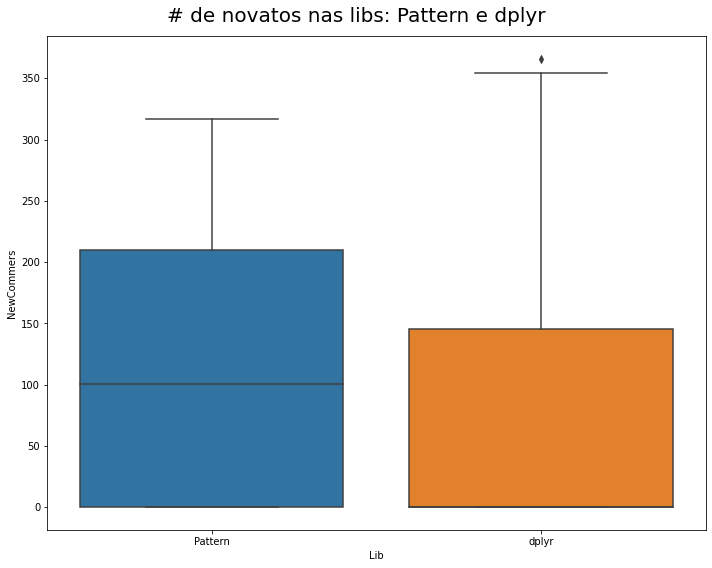

Hipotese nula rejeitada...
p:  2.2800106594183762e-05
d:  0.5366009948493462 
Pelo valor de "d", temos que a diferença dos conjuntos é medio significativo



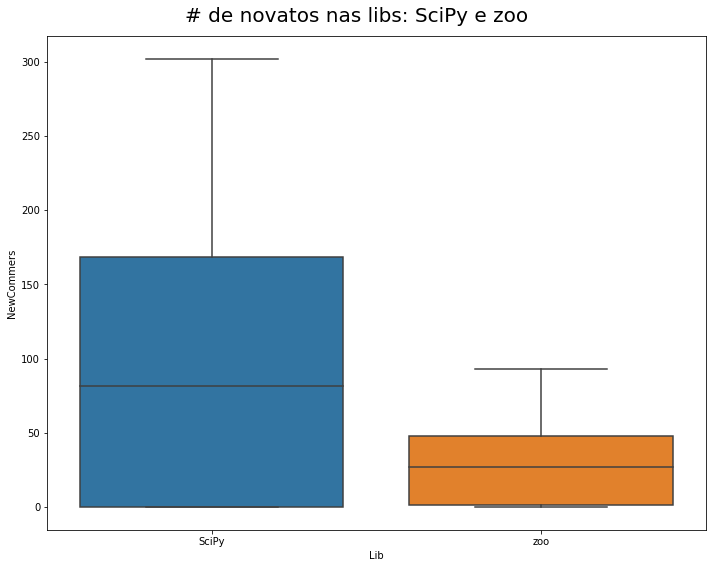

Hipotese nula rejeitada...
p:  2.649085183409635e-06
d:  1.0874927666688485 
Pelo valor de "d", temos que a diferença dos conjuntos é bastante significativo



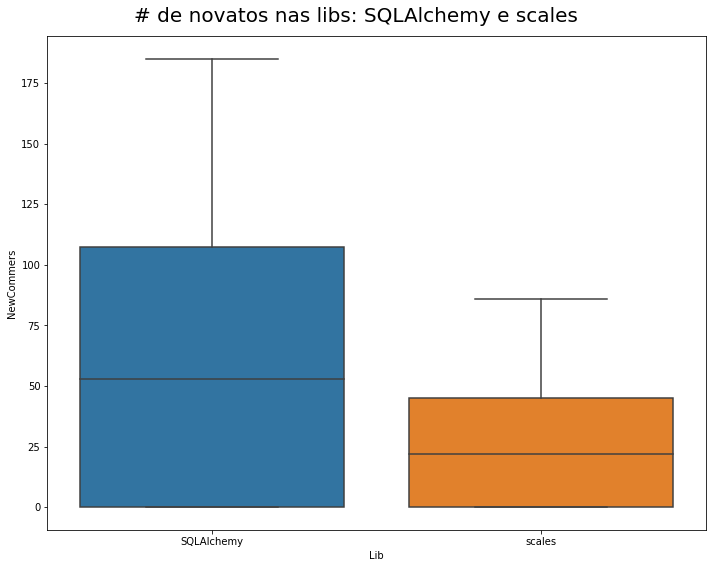

Hipotese nula rejeitada...
p:  1.5700112609005144e-05
d:  0.8818670660689855 
Pelo valor de "d", temos que a diferença dos conjuntos é bastante significativo



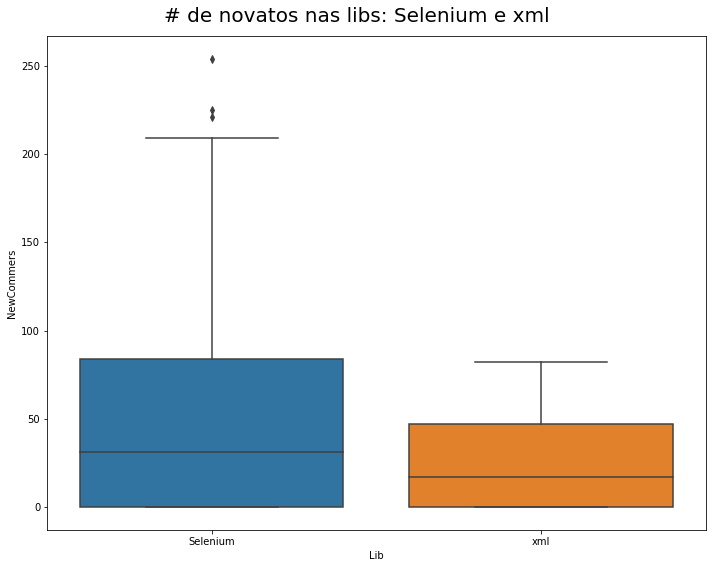

Hipotese nula rejeitada...
p:  0.00435784354449261
d:  0.681932241897247 
Pelo valor de "d", temos que a diferença dos conjuntos é medio significativo



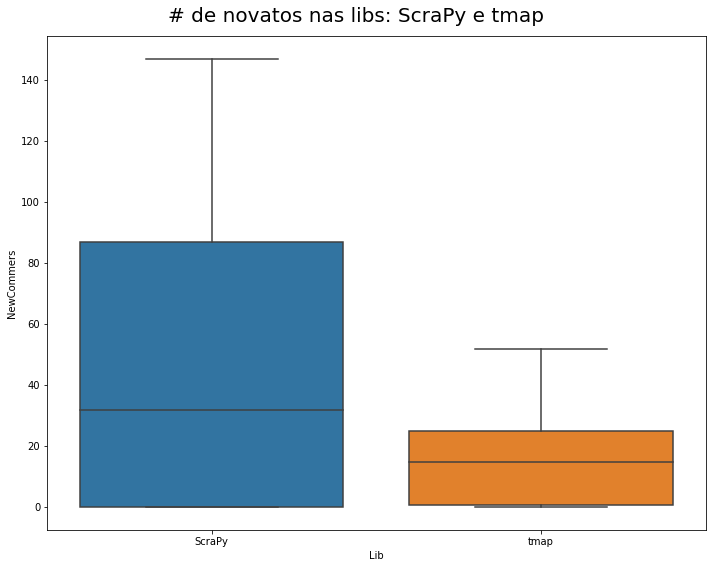

Hipotese nula rejeitada...
p:  0.0003104803762902893
d:  0.9230426651285828 
Pelo valor de "d", temos que a diferença dos conjuntos é bastante significativo



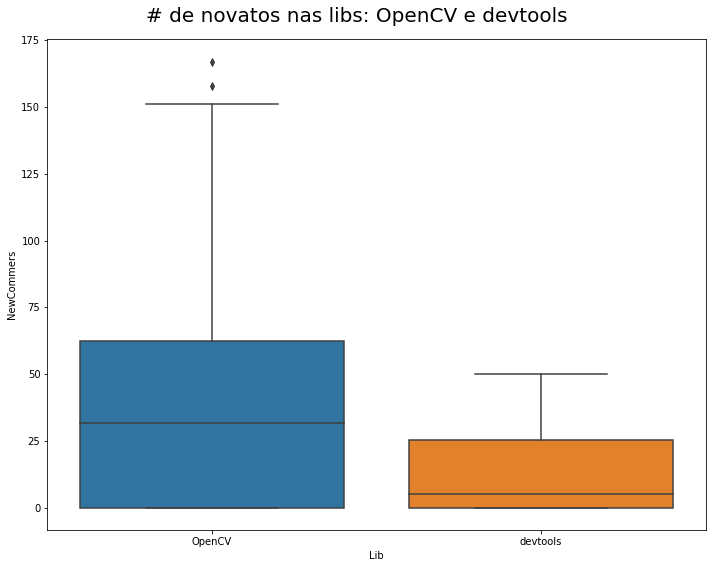

Hipotese nula rejeitada...
p:  1.2078205684616217e-05
d:  0.8694769135189672 
Pelo valor de "d", temos que a diferença dos conjuntos é bastante significativo



In [6]:
plotByYear = []

for libPython, libR in zip(pythonRepeat[:10], Rrepeat[:10]):

    dataP = pd.DataFrame(columns=['Language', 'Lib', 'NewCommers'])
    dataR = pd.DataFrame(columns=['Language', 'Lib', 'NewCommers'])
    
    dataP['NewCommers'] = data.loc[(data['Lib'] == libPython[1]), 'NewCommers']
    dataP['Lib'] = libPython[1]
    dataP['Language'] = 'Python'

    dataR['NewCommers'] = data.loc[(data['Lib'] == libR[1]), 'NewCommers']
    dataR['Lib'] = libR[1]
    dataR['Language'] = 'r'

    dataALL = dataP.reset_index().merge(dataR.reset_index(), how='outer')

    fig = plt.figure(figsize=(10, 8))
    sns.boxplot(data=dataALL, y='NewCommers', x='Lib')
    fig.suptitle(f"# de novatos nas libs: {libPython[1]} e {libR[1]}", fontsize=20)
    fig.tight_layout()
    plt.show()

    U1, p = mannwhitneyu(dataALL.loc[(dataALL['Lib'] == libPython[1]), 'NewCommers'].values.tolist(), dataALL.loc[(dataALL['Lib'] == libR[1]), 'NewCommers'].values.tolist())

    if p < 0.05:
        print('Hipotese nula rejeitada...\np: ', p)
        d = cohend(dataALL.loc[(dataALL['Lib'] == libPython[1]), 'NewCommers'].values.tolist(), dataALL.loc[(dataALL['Lib'] == libR[1]), 'NewCommers'].values.tolist())

        text = ''
        if d < 0.20:
                text = 'trivial'
        elif d >= 0.20 and d < 0.50:
            text = 'pouco significativo'
        elif d >= 0.50 and d < 0.80:
            text = 'medio significativo'
        elif d >= 0.80:
            text = 'bastante significativo'

        print('d: ', d, '\nPelo valor de "d", temos que a diferença dos conjuntos é', text, end='\n\n')
    else:
        plotByYear.append([libPython[1], libR[1]])
        print(f'Hipotese nula não rejeitada...\np: {p}!\n\n')

libPython:  Pandas libR:  ggplot2
ano: 2009
ano: 2010

ANO DE 2011:
Hipotese nula rejeitada...
p:  4.086162790343597e-05
d:  -3.1259405875186017 
Pelo valor de "d", temos que a diferença dos conjuntos é trivial


ANO DE 2012:
Hipotese nula rejeitada...
p:  0.002914724983409631
d:  -1.384023398037906 
Pelo valor de "d", temos que a diferença dos conjuntos é trivial


ANO DE 2013:
Hipotese nula não rejeitada...
p: 0.0939255560418968!



ANO DE 2014:
Hipotese nula rejeitada...
p:  3.644202729246209e-05
d:  10.08282182130329 
Pelo valor de "d", temos que a diferença dos conjuntos é bastante significativo


ANO DE 2015:
Hipotese nula rejeitada...
p:  3.6584553538971e-05
d:  4.057459686221051 
Pelo valor de "d", temos que a diferença dos conjuntos é bastante significativo


ANO DE 2016:
Hipotese nula rejeitada...
p:  0.006087880367858857
d:  1.8671153159239997 
Pelo valor de "d", temos que a diferença dos conjuntos é bastante significativo

ano: 2017


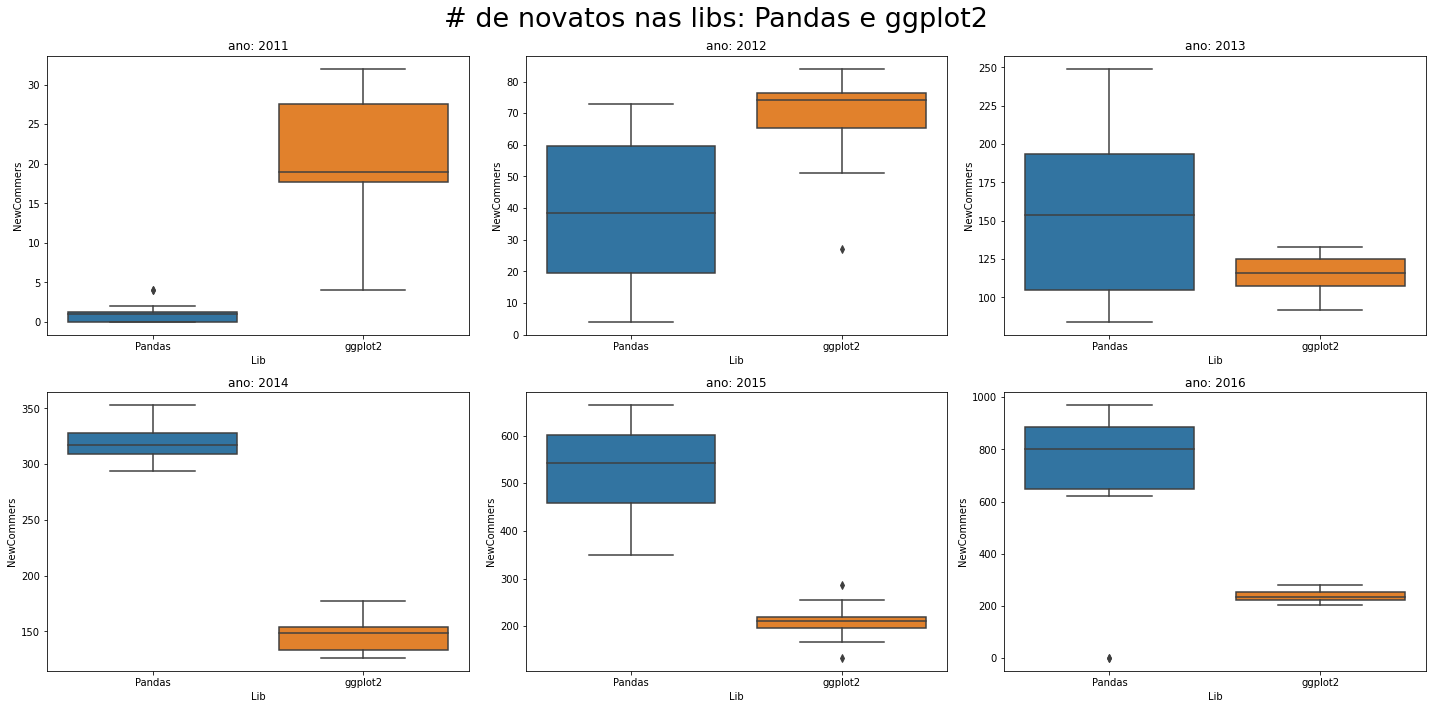

In [7]:
anoNot = [2017, 2009, 2010]

for libPython, libR in plotByYear:
    print('libPython: ', libPython, 'libR: ', libR)

    fig, axs = plt.subplots(2, 3, figsize=(20, 10))
    fig.suptitle(f'# de novatos nas libs: {libPython} e {libR}', fontsize=27)
    idx = 0
    col = 0

    for ano in data['Year'].unique().tolist():

        if ano in anoNot:
            print(f'ano: {ano}')
            continue
        
        dataP = pd.DataFrame(columns=['Language', 'Lib', 'Year', 'NewCommers'])
        dataR = pd.DataFrame(columns=['Language', 'Lib', 'Year', 'NewCommers'])
        
        dataP['NewCommers'] = data.loc[(data['Year'] == ano) & (data['Lib'] == libPython), 'NewCommers']
        dataP['Lib'] = libPython
        dataP['Language'] = 'Python'
        dataP['Year'] = ano

        dataR['NewCommers'] = data.loc[(data['Year'] == ano) & (data['Lib'] == libR), 'NewCommers']
        dataR['Lib'] = libR
        dataR['Language'] = 'r'
        dataR['Year'] = ano

        dataALL = dataP.reset_index().merge(dataR.reset_index(), how='outer')

        axs[col][idx].title.set_text(f"ano: {ano}")
        sns.boxplot(data=dataALL, y='NewCommers', x='Lib', ax=axs[col][idx])

        U1, p = mannwhitneyu(dataALL.loc[(dataALL['Lib'] == libPython), 'NewCommers'].values.tolist(), dataALL.loc[(dataALL['Lib'] == libR), 'NewCommers'].values.tolist())

        print(f'\nANO DE {ano}:')
        if p < 0.05:
            print('Hipotese nula rejeitada...\np: ', p)
            d = cohend(dataALL.loc[(dataALL['Lib'] == libPython), 'NewCommers'].values.tolist(), dataALL.loc[(dataALL['Lib'] == libR), 'NewCommers'].values.tolist())

            text = ''
            if d < 0.20:
                    text = 'trivial'
            elif d >= 0.20 and d < 0.50:
                text = 'pouco significativo'
            elif d >= 0.50 and d < 0.80:
                text = 'medio significativo'
            elif d >= 0.80:
                text = 'bastante significativo'

            print('d: ', d, '\nPelo valor de "d", temos que a diferença dos conjuntos é', text, end='\n\n')
        else:
            print(f'Hipotese nula não rejeitada...\np: {p}!\n\n')

        idx += 1

        if idx == 3:
            idx = 0
            col += 1

    fig.tight_layout()
    plt.show()
